In [4]:
%run ../utils/point_evaluation.py

In [5]:
import numpy as np
import pandas as pd
import geopandas as gpd

### Confusion matrices


DOT Performance Metrics:
tp: 50.0000
fp: 140.0000
fn: 378.0000
precision: 0.2632
recall: 0.1168
f1: 0.1618
accuracy: 0.0880

PLA Performance Metrics:
tp: 303.0000
fp: 68.0000
fn: 125.0000
precision: 0.8167
recall: 0.7079
f1: 0.7584
accuracy: 0.6109

PLE Performance Metrics:
tp: 357.0000
fp: 52.0000
fn: 71.0000
precision: 0.8729
recall: 0.8341
f1: 0.8530
accuracy: 0.7438


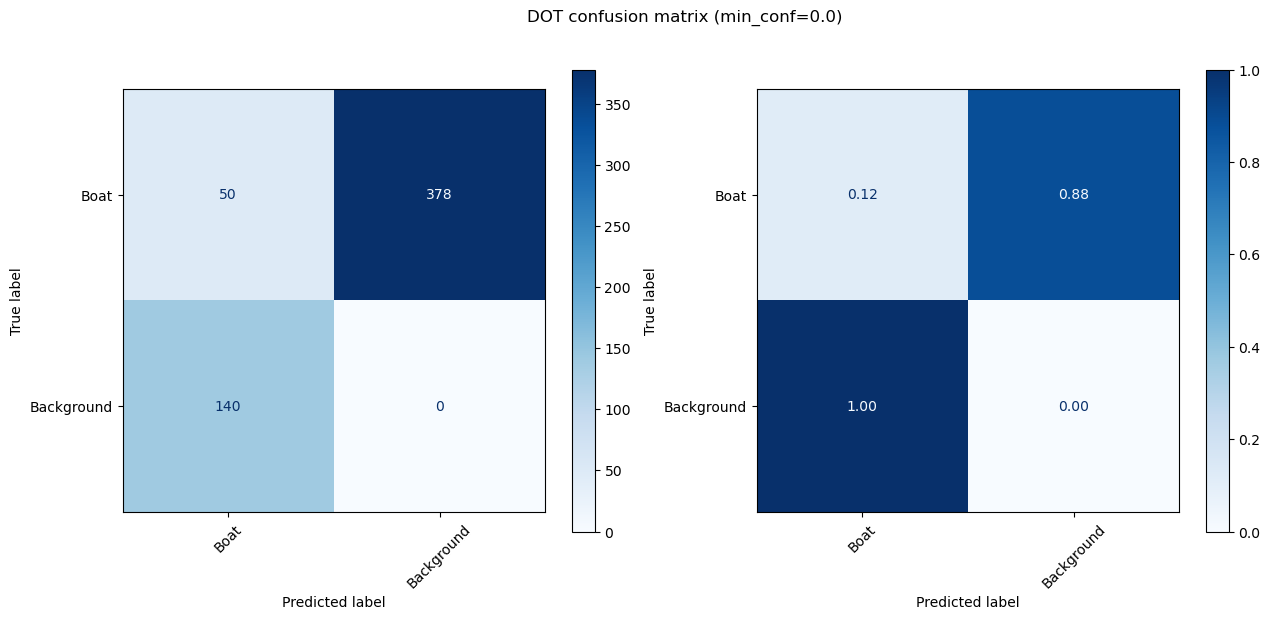

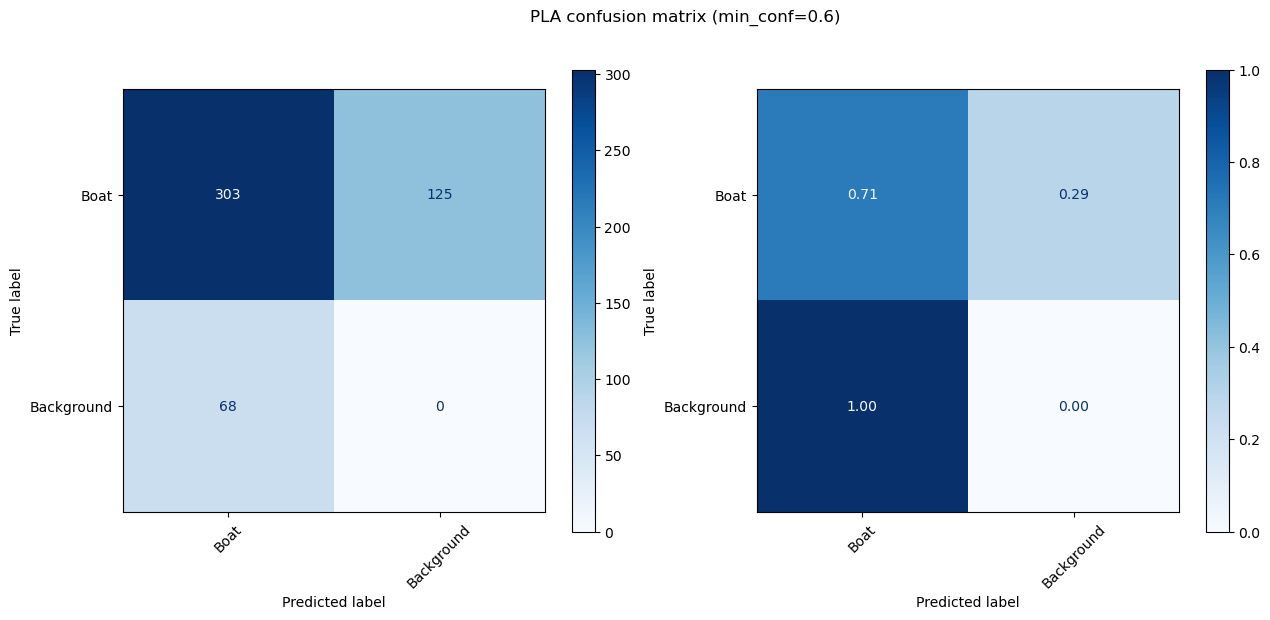

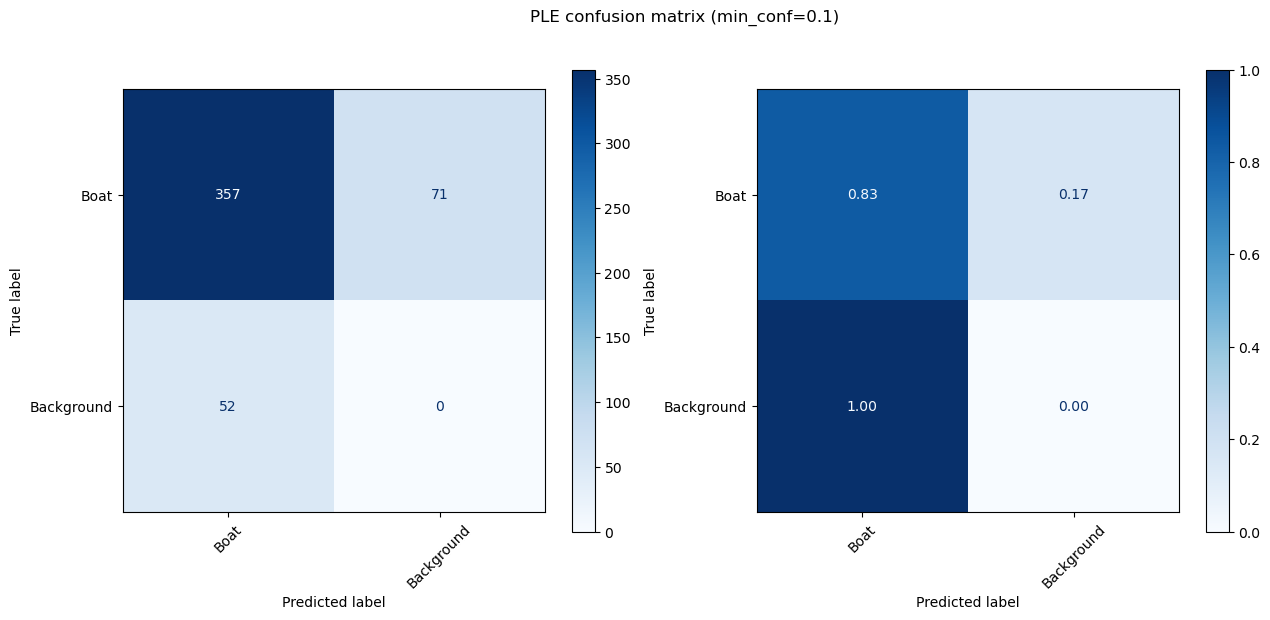

In [6]:
max_distances = [15, 100]

# Load groundtruth
gdf_groundtruth = gpd.read_file('groundtruth.csv')
gdf_groundtruth = gdf_groundtruth.apply(pd.to_numeric, errors='coerce')
gdf_groundtruth = gdf_groundtruth.dropna(subset=['latitude', 'longitude'])




#---------------------- DOT DETECTIONS ----------------------#
min_confidence = 0.0

# Load predictions 
gdf_dot = gpd.read_file('detections/dot_detections.csv')
gdf_dot = gdf_dot.apply(pd.to_numeric, errors='coerce')
gdf_dot = gdf_dot[gdf_dot['confidence'] >= min_confidence]
gdf_dot = gdf_dot.dropna(subset=['latitude', 'longitude'])

# Match predictions to groundtruth
gdf_match = match_dt_gt(gdf_dot, gdf_groundtruth, max_distances, with_conf=True)
gdf_match.to_csv('detections/match_gt_dot.csv', index=False)

# Display the performance metrics
metrics = evaluate(gdf_match)
plot_confmat(metrics, f"DOT confusion matrix (min_conf={min_confidence})")
print("\nDOT Performance Metrics:")
for key, value in metrics.items():
    print(f"{key}: {value:.4f}")




#---------------------- PLA DETECTIONS ----------------------#
min_confidence = 0.6

# Load predictions 
gdf_pla = gpd.read_file('detections/pla_detections.csv')
gdf_pla = gdf_pla.apply(pd.to_numeric, errors='coerce')
gdf_pla = gdf_pla[gdf_pla['confidence'] >= min_confidence]
gdf_pla = gdf_pla.dropna(subset=['latitude', 'longitude'])

# Match predictions to groundtruth
gdf_match = match_dt_gt(gdf_pla, gdf_groundtruth, max_distances, with_conf=True)
gdf_match.to_csv('detections/match_gt_pla.csv', index=False)

# Display the performance metrics
metrics = evaluate(gdf_match)
plot_confmat(metrics, f"PLA confusion matrix (min_conf={min_confidence})")
print("\nPLA Performance Metrics:")
for key, value in metrics.items():
    print(f"{key}: {value:.4f}")



#---------------------- PLE DETECTIONS ----------------------#
min_confidence = 0.1

# Load predictions 
gdf_ple = gpd.read_file('detections/ple_detections.csv')
gdf_ple = gdf_ple.apply(pd.to_numeric, errors='coerce')
gdf_ple = gdf_ple[gdf_ple['confidence'] >= min_confidence]
gdf_ple = gdf_ple.dropna(subset=['latitude', 'longitude'])

# Match predictions to groundtruth
gdf_match = match_dt_gt(gdf_ple, gdf_groundtruth, max_distances, with_conf=True)
gdf_match.to_csv('detections/match_gt_ple.csv', index=False)

# Display the performance metrics
metrics = evaluate(gdf_match)
plot_confmat(metrics, f"PLE confusion matrix (min_conf={min_confidence})")
print("\nPLE Performance Metrics:")
for key, value in metrics.items():
    print(f"{key}: {value:.4f}")





### Precision, recall and F1

Evaluating with min_confidence=0.00
Evaluating with min_confidence=0.10
Evaluating with min_confidence=0.20
Evaluating with min_confidence=0.30
Evaluating with min_confidence=0.40
Evaluating with min_confidence=0.50
Evaluating with min_confidence=0.60
Evaluating with min_confidence=0.70
Evaluating with min_confidence=0.80
Evaluating with min_confidence=0.90


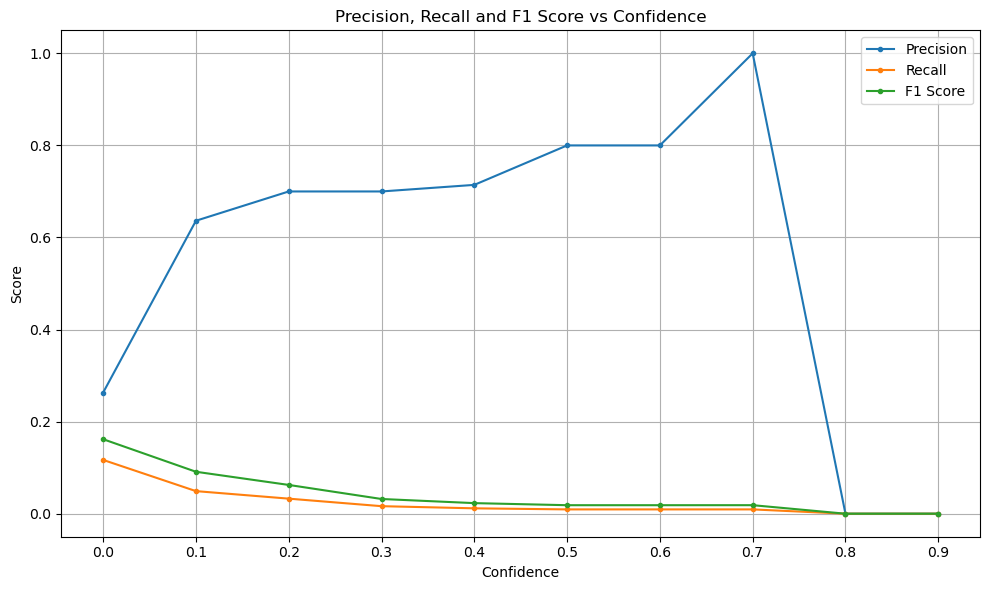

Evaluating with min_confidence=0.00
Evaluating with min_confidence=0.10
Evaluating with min_confidence=0.20
Evaluating with min_confidence=0.30
Evaluating with min_confidence=0.40
Evaluating with min_confidence=0.50
Evaluating with min_confidence=0.60
Evaluating with min_confidence=0.70
Evaluating with min_confidence=0.80
Evaluating with min_confidence=0.90


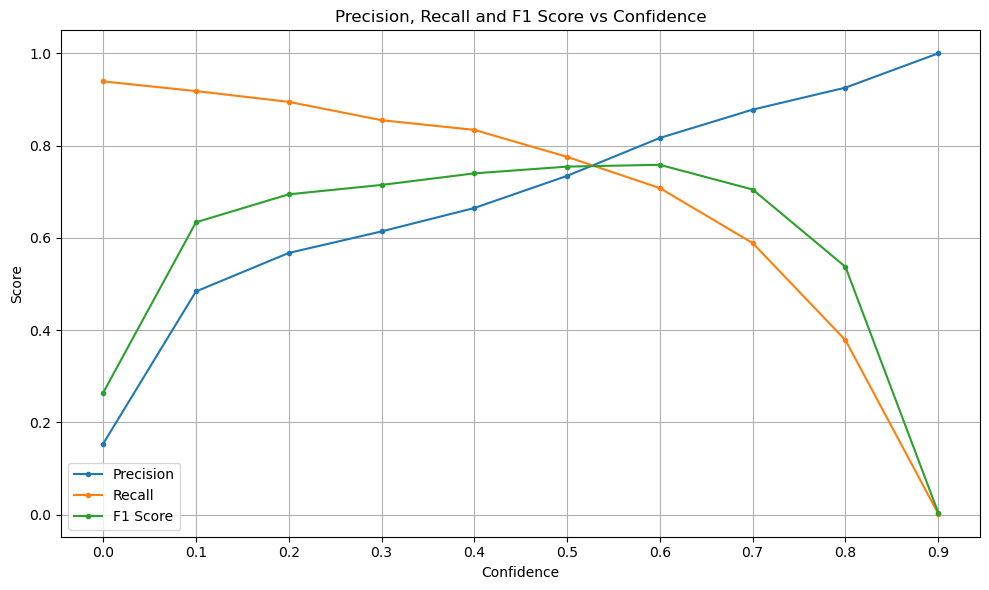

Evaluating with min_confidence=0.00
Evaluating with min_confidence=0.10
Evaluating with min_confidence=0.20
Evaluating with min_confidence=0.30
Evaluating with min_confidence=0.40
Evaluating with min_confidence=0.50
Evaluating with min_confidence=0.60
Evaluating with min_confidence=0.70
Evaluating with min_confidence=0.80
Evaluating with min_confidence=0.90


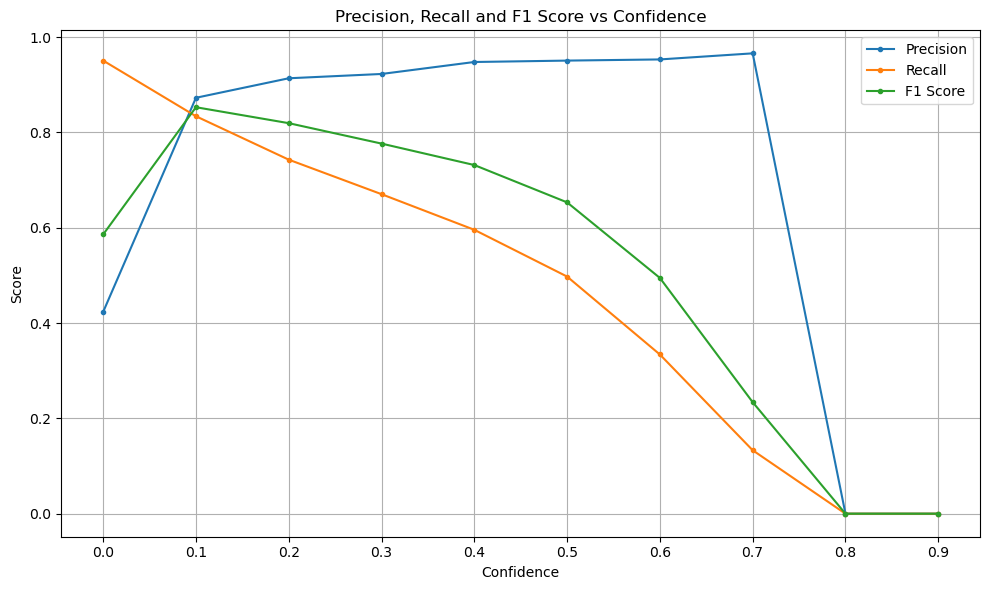

In [35]:
max_distances = [15, 100]
min_confidence_list = np.arange(0.0, 1.0, 0.1).tolist()
min_confidence_list = [round(x, 2) for x in min_confidence_list]

# Load groundtruth
gdf_groundtruth = gpd.read_file('groundtruth.csv')
gdf_groundtruth = gdf_groundtruth.apply(pd.to_numeric, errors='coerce')
gdf_groundtruth = gdf_groundtruth.dropna(subset=['latitude', 'longitude'])




#---------------------- DOT DETECTIONS ----------------------#
# Load predictions
gdf_dot = gpd.read_file('detections/dot_detections.csv')
gdf_dot = gdf_dot.apply(pd.to_numeric, errors='coerce')
gdf_dot = gdf_dot.dropna(subset=['latitude', 'longitude'])

# Match predictions to groundtruth
multi_metrics = multi_evaluate_conf(gdf_dot, gdf_groundtruth, min_confidence_list, max_distances)

# Display the performance metrics
plot_prf1_conf(multi_metrics, min_confidence_list)


#---------------------- PLA DETECTIONS ----------------------#
# Load predictions
gdf_pla = gpd.read_file('detections/pla_detections.csv')
gdf_pla = gdf_pla.apply(pd.to_numeric, errors='coerce')
gdf_pla = gdf_pla.dropna(subset=['latitude', 'longitude'])

# Match predictions to groundtruth
multi_metrics = multi_evaluate_conf(gdf_pla, gdf_groundtruth, min_confidence_list, max_distances)

# Display the performance metrics
plot_prf1_conf(multi_metrics, min_confidence_list)


#---------------------- PLE DETECTIONS ----------------------#
# Load predictions
gdf_ple = gpd.read_file('detections/ple_detections.csv')
gdf_ple = gdf_ple.apply(pd.to_numeric, errors='coerce')
gdf_ple = gdf_ple.dropna(subset=['latitude', 'longitude'])

# Match predictions to groundtruth
multi_metrics = multi_evaluate_conf(gdf_ple, gdf_groundtruth, min_confidence_list, max_distances)

# Display the performance metrics
plot_prf1_conf(multi_metrics, min_confidence_list)